# Doppelganger

In [ ]:
%load_ext autoreload
%autoreload 2

## Imports

In [ ]:
from fastai.vision.all import *
from fastai.vision.widgets import *
from aiking.data.external import *

In [ ]:
path = get_ds("DoppelGanger"); path.ls()

(#8) [Path('/Landmark2/pdo/aiking/data/DoppelGanger/Javier_Bardem'),Path('/Landmark2/pdo/aiking/data/DoppelGanger/Mercedes_Masohn'),Path('/Landmark2/pdo/aiking/data/DoppelGanger/Sarah_Shahi'),Path('/Landmark2/pdo/aiking/data/DoppelGanger/Jeffrey_Dean_Morgan'),Path('/Landmark2/pdo/aiking/data/DoppelGanger/Brad_Pitt'),Path('/Landmark2/pdo/aiking/data/DoppelGanger/Benicio_Del_Toro'),Path('/Landmark2/pdo/aiking/data/DoppelGanger/Cuba_Gooding_Jr'),Path('/Landmark2/pdo/aiking/data/DoppelGanger/Donald_Faison')]

In [ ]:
!exa --grid {path}

Benicio_Del_Toro  Cuba_Gooding_Jr  Javier_Bardem        Mercedes_Masohn
Brad_Pitt         Donald_Faison    Jeffrey_Dean_Morgan  Sarah_Shahi


## Define Datablock & Dataloaders

In [ ]:
doppelganger = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items=get_image_files,
    get_y=parent_label,
    splitter=RandomSplitter(valid_pct=0.2, seed = 42),
    item_tfms=RandomResizedCrop(224,min_scale=0.3),
    batch_tfms = aug_transforms()
)

doppelganger

In [ ]:
dls = doppelganger.dataloaders(path); dls

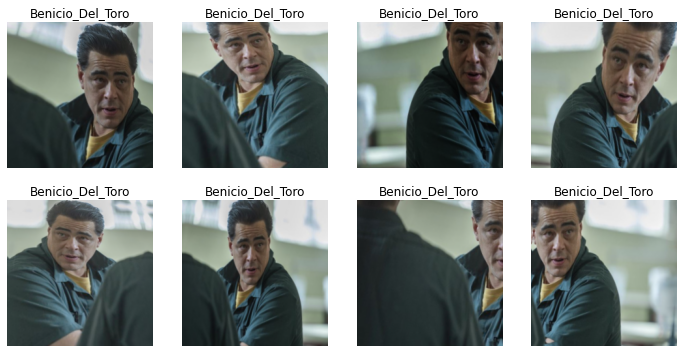

In [ ]:
dls.train.show_batch(max_n=8,nrows=2,unique=True)

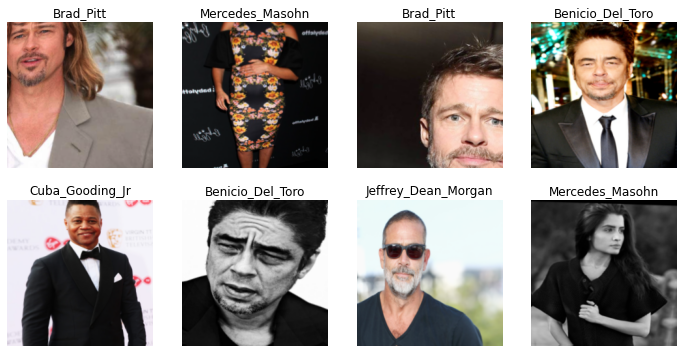

In [ ]:
dls.train.show_batch(max_n=8,nrows=2)

## Training and Fine Tuning

In [ ]:
learn = cnn_learner(dls, resnet18, metrics= [ accuracy, error_rate]); learn

In [ ]:
learn.fine_tune(8)

## Classification Interpretation

In [ ]:
interp = ClassificationInterpretation.from_learner(learn); interp

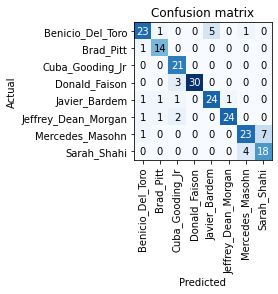

In [ ]:
interp.plot_confusion_matrix()

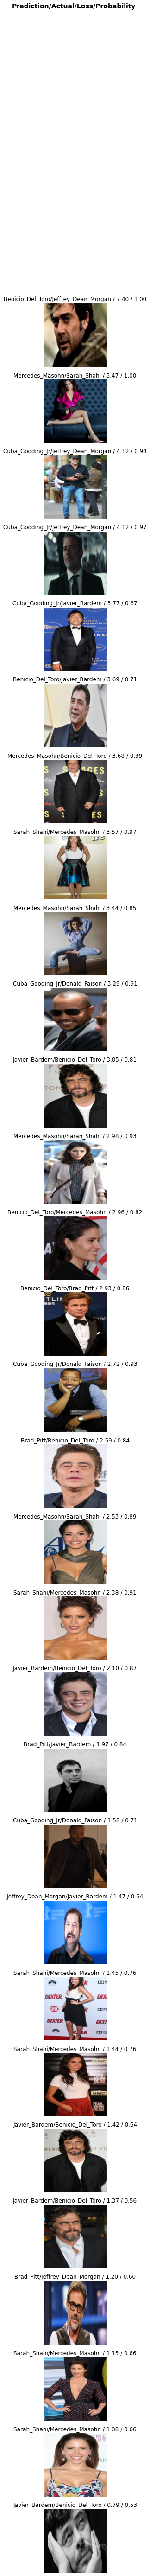

In [ ]:
interp.plot_top_losses(k=30, nrows=30)

## ML Driven Data Cleaning

In [ ]:
cleaner = ImageClassifierCleaner(learn)
cleaner

```{note}
Couldnot figure out any good cases to be cleaned. Although being in suit seems to play an important role for classifer particularily for Cuba Gooding Jr.
```

In [ ]:
?ImageClassifierCleaner

Init signature: ImageClassifierCleaner(learn, opts=(), height=128, width=256, max_n=30)
Docstring:      A widget that provides an `ImagesCleaner` with a CNN `Learner`
File:           ~/anaconda3/envs/aiking/lib/python3.8/site-packages/fastai/vision/widgets.py
Type:           type
Subclasses:     


## Model Export

In [ ]:
c = Config()
# c.model_path.mkdir()
# (c.model_path/'doppelganger.pkl').unlink()
learn.export(c.learner_path/'doppelganger.pkl')

## Inference

In [ ]:
learn_inf = load_learner(c.learner_path/'doppelganger.pkl')

In [ ]:
uploader = widgets.FileUpload(); uploader

FileUpload(value={}, description='Upload')

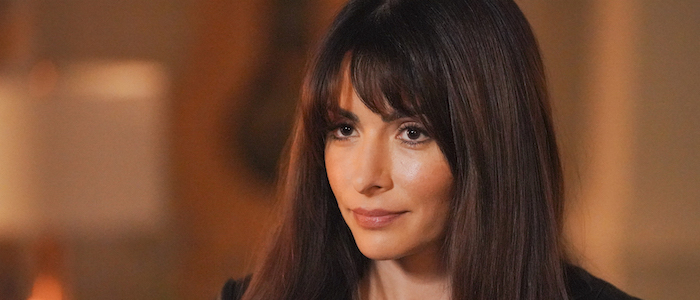

In [ ]:
img = PILImage.create(uploader.data[0])
img

In [ ]:
learn_inf.predict(img)

('Mercedes_Masohn',
 tensor(6),
 tensor([2.4761e-05, 2.0251e-06, 4.3338e-04, 3.2580e-03, 6.0018e-05, 7.6089e-07,
         9.8427e-01, 1.1951e-02]))

In [ ]:
uploader = widgets.FileUpload(); uploader

FileUpload(value={}, description='Upload')

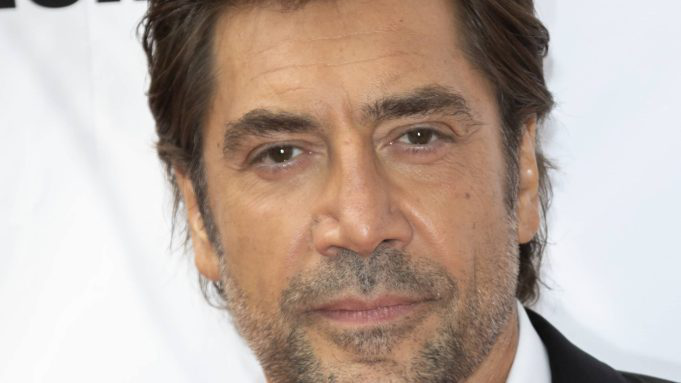

In [ ]:
img = PILImage.create(uploader.data[0])
img

In [ ]:
learn_inf.predict(img)

('Javier_Bardem',
 tensor(4),
 tensor([4.2255e-06, 3.2207e-06, 5.6138e-08, 2.0617e-05, 9.9911e-01, 8.4978e-04,
         3.7117e-07, 1.3715e-05]))

```{note}
Model Got Sarah Shahi wrong and Javier Bardem Correct. What to do to improve things further?
```